In [ ]:
from google.colab import files
uploaded = files.upload()  # dataset.zip 올리기


Saving food_3.v3i.yolov5pytorch.zip to food_3.v3i.yolov5pytorch.zip


In [ ]:
import zipfile

zip_path = "food_3.v3i.yolov5pytorch.zip"  # 올바른 파일명
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # 현재 디렉토리에 압축 해제


In [ ]:
import os
import shutil
import random
from collections import defaultdict
from tqdm import tqdm

# 수정된 경로: 현재 Colab 환경 기준
base_dir = "/content"
image_input_dir = os.path.join(base_dir, "train", "images")
label_input_dir = os.path.join(base_dir, "train", "labels")

# 출력 폴더 생성 (train/val/test 디렉토리 아래로 이동)
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(base_dir, "images", split), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "labels", split), exist_ok=True)

# 클래스별로 분류 (첫 줄 클래스 기준)
class_to_files = defaultdict(list)

for label_file in os.listdir(label_input_dir):
    label_path = os.path.join(label_input_dir, label_file)
    with open(label_path, 'r') as f:
        lines = f.readlines()
        if not lines:
            continue
        class_id = lines[0].strip().split()[0]
        image_file = label_file.replace('.txt', '.jpg')
        if os.path.exists(os.path.join(image_input_dir, image_file)):
            class_to_files[class_id].append(label_file)

# 클래스별 8:1:1 분할
for class_id, label_files in tqdm(class_to_files.items()):
    random.shuffle(label_files)
    n = len(label_files)
    n_train = int(n * 0.8)
    n_val = int(n * 0.1)

    for i, file in enumerate(label_files):
        if i < n_train:
            split = "train"
        elif i < n_train + n_val:
            split = "val"
        else:
            split = "test"

        img_src = os.path.join(image_input_dir, file.replace('.txt', '.jpg'))
        lbl_src = os.path.join(label_input_dir, file)

        img_dst = os.path.join(base_dir, "images", split, file.replace('.txt', '.jpg'))
        lbl_dst = os.path.join(base_dir, "labels", split, file)

        shutil.copy(img_src, img_dst)
        shutil.copy(lbl_src, lbl_dst)

print("✅ 클래스별로 8:1:1 비율로 분할 완료!")


100%|██████████| 13/13 [00:00<00:00, 42.93it/s]

✅ 클래스별로 8:1:1 비율로 분할 완료!


In [ ]:
import os
import shutil
import random
from collections import defaultdict
from tqdm import tqdm

# 현재 구조 기준 경로
image_input_dir = "train/images"
label_input_dir = "train/labels"

# 새로 나눌 경로
for split in ["train", "val", "test"]:
    os.makedirs(f"images/{split}", exist_ok=True)
    os.makedirs(f"labels/{split}", exist_ok=True)

# 클래스별 분류
class_to_files = defaultdict(list)

for label_file in os.listdir(label_input_dir):
    label_path = os.path.join(label_input_dir, label_file)
    with open(label_path, "r") as f:
        lines = f.readlines()
        if not lines:
            continue
        class_id = lines[0].strip().split()[0]
        image_file = label_file.replace(".txt", ".jpg")
        if os.path.exists(os.path.join(image_input_dir, image_file)):
            class_to_files[class_id].append(label_file)

# 클래스별 8:1:1 분할
for class_id, label_files in tqdm(class_to_files.items()):
    random.shuffle(label_files)
    total = len(label_files)
    n_train = int(total * 0.8)
    n_val = int(total * 0.1)

    for i, file in enumerate(label_files):
        if i < n_train:
            split = "train"
        elif i < n_train + n_val:
            split = "val"
        else:
            split = "test"

        src_img = os.path.join(image_input_dir, file.replace(".txt", ".jpg"))
        src_lbl = os.path.join(label_input_dir, file)

        dst_img = os.path.join("images", split, file.replace(".txt", ".jpg"))
        dst_lbl = os.path.join("labels", split, file)

        shutil.copy(src_img, dst_img)
        shutil.copy(src_lbl, dst_lbl)

print("✅ 클래스별로 8:1:1 분할 완료")


100%|██████████| 13/13 [00:00<00:00, 28.48it/s]

✅ 클래스별로 8:1:1 분할 완료


In [ ]:
yaml_content = """train: ./images/train
val: ./images/val
test: ./images/test

nc: 13
names: ['bachu_kimchi', 'bean', 'cucumber', 'eggsoup', 'kkakdugi', 'miyeokguk', 'muguk', 'musaengchae', 'siregi', 'sujebi', 'tteokbokki', 'white_kimchi', 'yukgaejang']
"""

with open("data.yaml", "w", encoding="utf-8") as f:
    f.write(yaml_content)

print("✅ data.yaml 저장 완료!")


✅ data.yaml 저장 완료!


In [ ]:
# YOLOv5 공식 깃허브에서 클론
!git clone https://github.com/ultralytics/yolov5.git

# yolov5 디렉토리로 이동
%cd yolov5

# 필요한 라이브러리 설치
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.59 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (11992/11992), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00

In [ ]:
from google.colab import files
uploaded = files.upload()  # dataset.zip 올리기


Saving food_3.v3i.yolov5pytorch.zip to food_3.v3i.yolov5pytorch.zip


In [ ]:
import zipfile

zip_path = "food_3.v3i.yolov5pytorch.zip"  # 올바른 파일명
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # 현재 디렉토리에 압축 해제

In [ ]:
import os
import shutil
import random
from collections import defaultdict
from tqdm import tqdm

# 현재 구조 기준 경로
image_input_dir = "train/images"
label_input_dir = "train/labels"

# 새로 나눌 경로
for split in ["train", "val", "test"]:
    os.makedirs(f"images/{split}", exist_ok=True)
    os.makedirs(f"labels/{split}", exist_ok=True)

# 클래스별 분류
class_to_files = defaultdict(list)

for label_file in os.listdir(label_input_dir):
    label_path = os.path.join(label_input_dir, label_file)
    with open(label_path, "r") as f:
        lines = f.readlines()
        if not lines:
            continue
        class_id = lines[0].strip().split()[0]
        image_file = label_file.replace(".txt", ".jpg")
        if os.path.exists(os.path.join(image_input_dir, image_file)):
            class_to_files[class_id].append(label_file)

# 클래스별 8:1:1 분할
for class_id, label_files in tqdm(class_to_files.items()):
    random.shuffle(label_files)
    total = len(label_files)
    n_train = int(total * 0.8)
    n_val = int(total * 0.1)

    for i, file in enumerate(label_files):
        if i < n_train:
            split = "train"
        elif i < n_train + n_val:
            split = "val"
        else:
            split = "test"

        src_img = os.path.join(image_input_dir, file.replace(".txt", ".jpg"))
        src_lbl = os.path.join(label_input_dir, file)

        dst_img = os.path.join("images", split, file.replace(".txt", ".jpg"))
        dst_lbl = os.path.join("labels", split, file)

        shutil.copy(src_img, dst_img)
        shutil.copy(src_lbl, dst_lbl)

print("✅ 클래스별로 8:1:1 분할 완료")


100%|██████████| 13/13 [00:00<00:00, 56.16it/s]

✅ 클래스별로 8:1:1 분할 완료


In [ ]:
yaml_content = """train: ./images/train
val: ./images/val
test: ./images/test

nc: 13
names: ['bachu_kimchi', 'bean', 'cucumber', 'eggsoup', 'kkakdugi', 'miyeokguk', 'muguk', 'musaengchae', 'siregi', 'sujebi', 'tteokbokki', 'white_kimchi', 'yukgaejang']
"""

with open("data.yaml", "w", encoding="utf-8") as f:
    f.write(yaml_content)

print("✅ data.yaml 저장 완료!")


✅ data.yaml 저장 완료!


In [ ]:
import shutil

# Colab 루트로 돌아가기
%cd /content

# 우리가 만든 data.yaml 복사
shutil.copy("data.yaml", "/content/yolov5/data.yaml")

# 이미지 및 라벨 폴더 yolov5 내부로 이동 (YOLO 학습용 경로 통일)
shutil.move("images", "/content/yolov5/images")
shutil.move("labels", "/content/yolov5/labels")


/content


'/content/yolov5/labels'

In [ ]:
%cd /content/yolov5

!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 100 \
  --data data.yaml \
  --weights yolov5s.pt \
  --name food-detect \
  --cache \
  --label-smoothing 0.05


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  with torch.cuda.amp.autocast(amp):
      59/99      4.56G    0.02777    0.01696    0.03287         54        640:  56% 33/59 [00:09<00:06,  4.04it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      59/99      4.56G    0.02787    0.01697    0.03282         50        640:  58% 34/59 [00:09<00:06,  3.77it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      59/99      4.56G    0.02784    0.01691    0.03281         48        640:  59% 35/59 [00:09<00:06,  3.79it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      59/99    

In [ ]:
from google.colab import drive
import shutil
import os

# 1. Google Drive 마운트
drive.mount('/content/drive')

# 2. YOLOv5 결과 디렉토리 설정 (현재 실험 이름: food-detect)
exp_name = "food-detect"
result_dir = f"/content/yolov5/runs/train/{exp_name}/"

# 3. 저장 경로 설정 (Google Drive)
save_dir = "/content/drive/MyDrive/yolov5_models"
os.makedirs(save_dir, exist_ok=True)

# 4. best.pt 저장
shutil.copy(os.path.join(result_dir, "weights", "best.pt"),
            os.path.join(save_dir, f"{exp_name}_best.pt"))

# 5. results.png 저장
shutil.copy(os.path.join(result_dir, "results.png"),
            os.path.join(save_dir, f"{exp_name}_results.png"))

print("✅ best.pt와 results.png 모두 Google Drive에 저장 완료되었습니다.")


Mounted at /content/drive
✅ best.pt와 results.png 모두 Google Drive에 저장 완료되었습니다.


In [ ]:
import torch
import cv2
import os
from pathlib import Path
from PIL import Image

# 모델 불러오기 (best.pt 경로는 학습 경로에 따라 수정)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/food-detect/weights/best.pt', force_reload=True)

# 이미지 폴더 지정 (예: test set)
source_dir = 'OSS-1/test/images'  # 또는 /content/images/test 처럼 실제 경로
output_dir = 'cropped'
os.makedirs(output_dir, exist_ok=True)

# 이미지 탐지 및 crop 저장
for img_path in Path(source_dir).glob('*.[jp][pn]g'):  # jpg, jpeg, png 모두 탐색
    img = Image.open(img_path)
    results = model(img)

    # OpenCV 이미지로 변환
    img_cv = cv2.imread(str(img_path))

    for i, (*xyxy, conf, cls) in enumerate(results.xyxy[0]):
        x1, y1, x2, y2 = map(int, xyxy)
        class_id = int(cls)
        class_name = model.names[class_id]

        # crop
        cropped_img = img_cv[y1:y2, x1:x2]

        # 저장 경로 설정
        filename = f"{img_path.stem}_{i}_{class_name}.jpg"
        save_path = os.path.join(output_dir, filename)

        # 저장
        cv2.imwrite(save_path, cropped_img)
        print(f"Saved: {save_path}")


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-6-19 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
import shutil

# 예시: Google Drive 내 저장 경로
drive_save_path = '/content/drive/MyDrive/yolo_crops'

# 폴더 통째로 복사
shutil.copytree('cropped', drive_save_path, dirs_exist_ok=True)


'/content/drive/MyDrive/yolo_crops'

In [ ]:
# best.pt 모델 파일 복사
shutil.copy('runs/train/food-detect/weights/best.pt', '/content/drive/MyDrive/best.pt')

# 학습 결과 그래프 이미지 저장
shutil.copy('runs/train/food-detect/results.png', '/content/drive/MyDrive/results.png')

# 탐지 이미지들 저장 (runs/detect/exp 등)
shutil.copytree('runs/detect/exp', '/content/drive/MyDrive/yolo_detect', dirs_exist_ok=True)


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp'

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python detect.py --weights runs/train/food-detect/weights/best.pt --img 640 --conf 0.3 --source OSS-1/test/images

detect: weights=['runs/train/food-detect/weights/best.pt'], source=OSS-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*arg

In [ ]:
!pwd


/content/yolov5


In [ ]:
!ls /content/OSS-1/test/images


ls: cannot access '/content/OSS-1/test/images': No such file or directory


In [ ]:
import zipfile

zip_path = "/content/food_3.v3i.yolov5pytorch.zip"  # 업로드한 zip 경로
extract_path = "/content"  # 압축을 풀 경로

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
!ls /content/food_3.v3i.yolov5pytorch/test/images


ls: cannot access '/content/food_3.v3i.yolov5pytorch/test/images': No such file or directory


In [ ]:
# 어떤 폴더가 생겼는지 보기
!ls /content


data.yaml  food_3.v3i.yolov5pytorch.zip  README.roboflow.txt  train
drive	   README.dataset.txt		 sample_data	      yolov5


In [ ]:
import zipfile

zip_path = "/content/food_3.v3i.yolov5pytorch.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")


In [ ]:
!ls /content/food_3.v3i.yolov5pytorch/test/images


ls: cannot access '/content/food_3.v3i.yolov5pytorch/test/images': No such file or directory


In [ ]:
%cd /content/yolov5

!python detect.py \
  --weights runs/train/food-detect/weights/best.pt \
  --img 640 \
  --conf 0.3 \
  --source /content/test/images \
  --save-crop


/content/yolov5
detect: weights=['runs/train/food-detect/weights/best.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
  

In [ ]:
!python detect.py \
  --weights runs/train/food-detect/weights/best.pt \
  --img 640 \
  --conf 0.3 \
  --source images/test \
  --save-crop \
  --project runs/detect \
  --name food-test


detect: weights=['runs/train/food-detect/weights/best.pt'], source=images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=food-test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/117 /content/yolov5/images/test/Img_014_0167_jpg.rf.7a6b6d1445651fa3de19c89cdb201e60.jpg: 640x640 1 eggsoup, 11.5ms
image 2/117 /content/yolov5/images/test/Img_014_0277_jpg.rf.69af225ebcc813acf3cf0c26f637ffbf.jpg: 640x640 1 eggsoup, 11.6ms
image 3/117 /content/yolov5/images/test/Img_014_0371_jpg.rf.d7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

shutil.copytree(
    '/content/yolov5/runs/detect/food-test',
    '/content/drive/MyDrive/yolo_detect_result',
    dirs_exist_ok=True  # 이미 존재하면 병합
)


'/content/drive/MyDrive/yolo_detect_result'

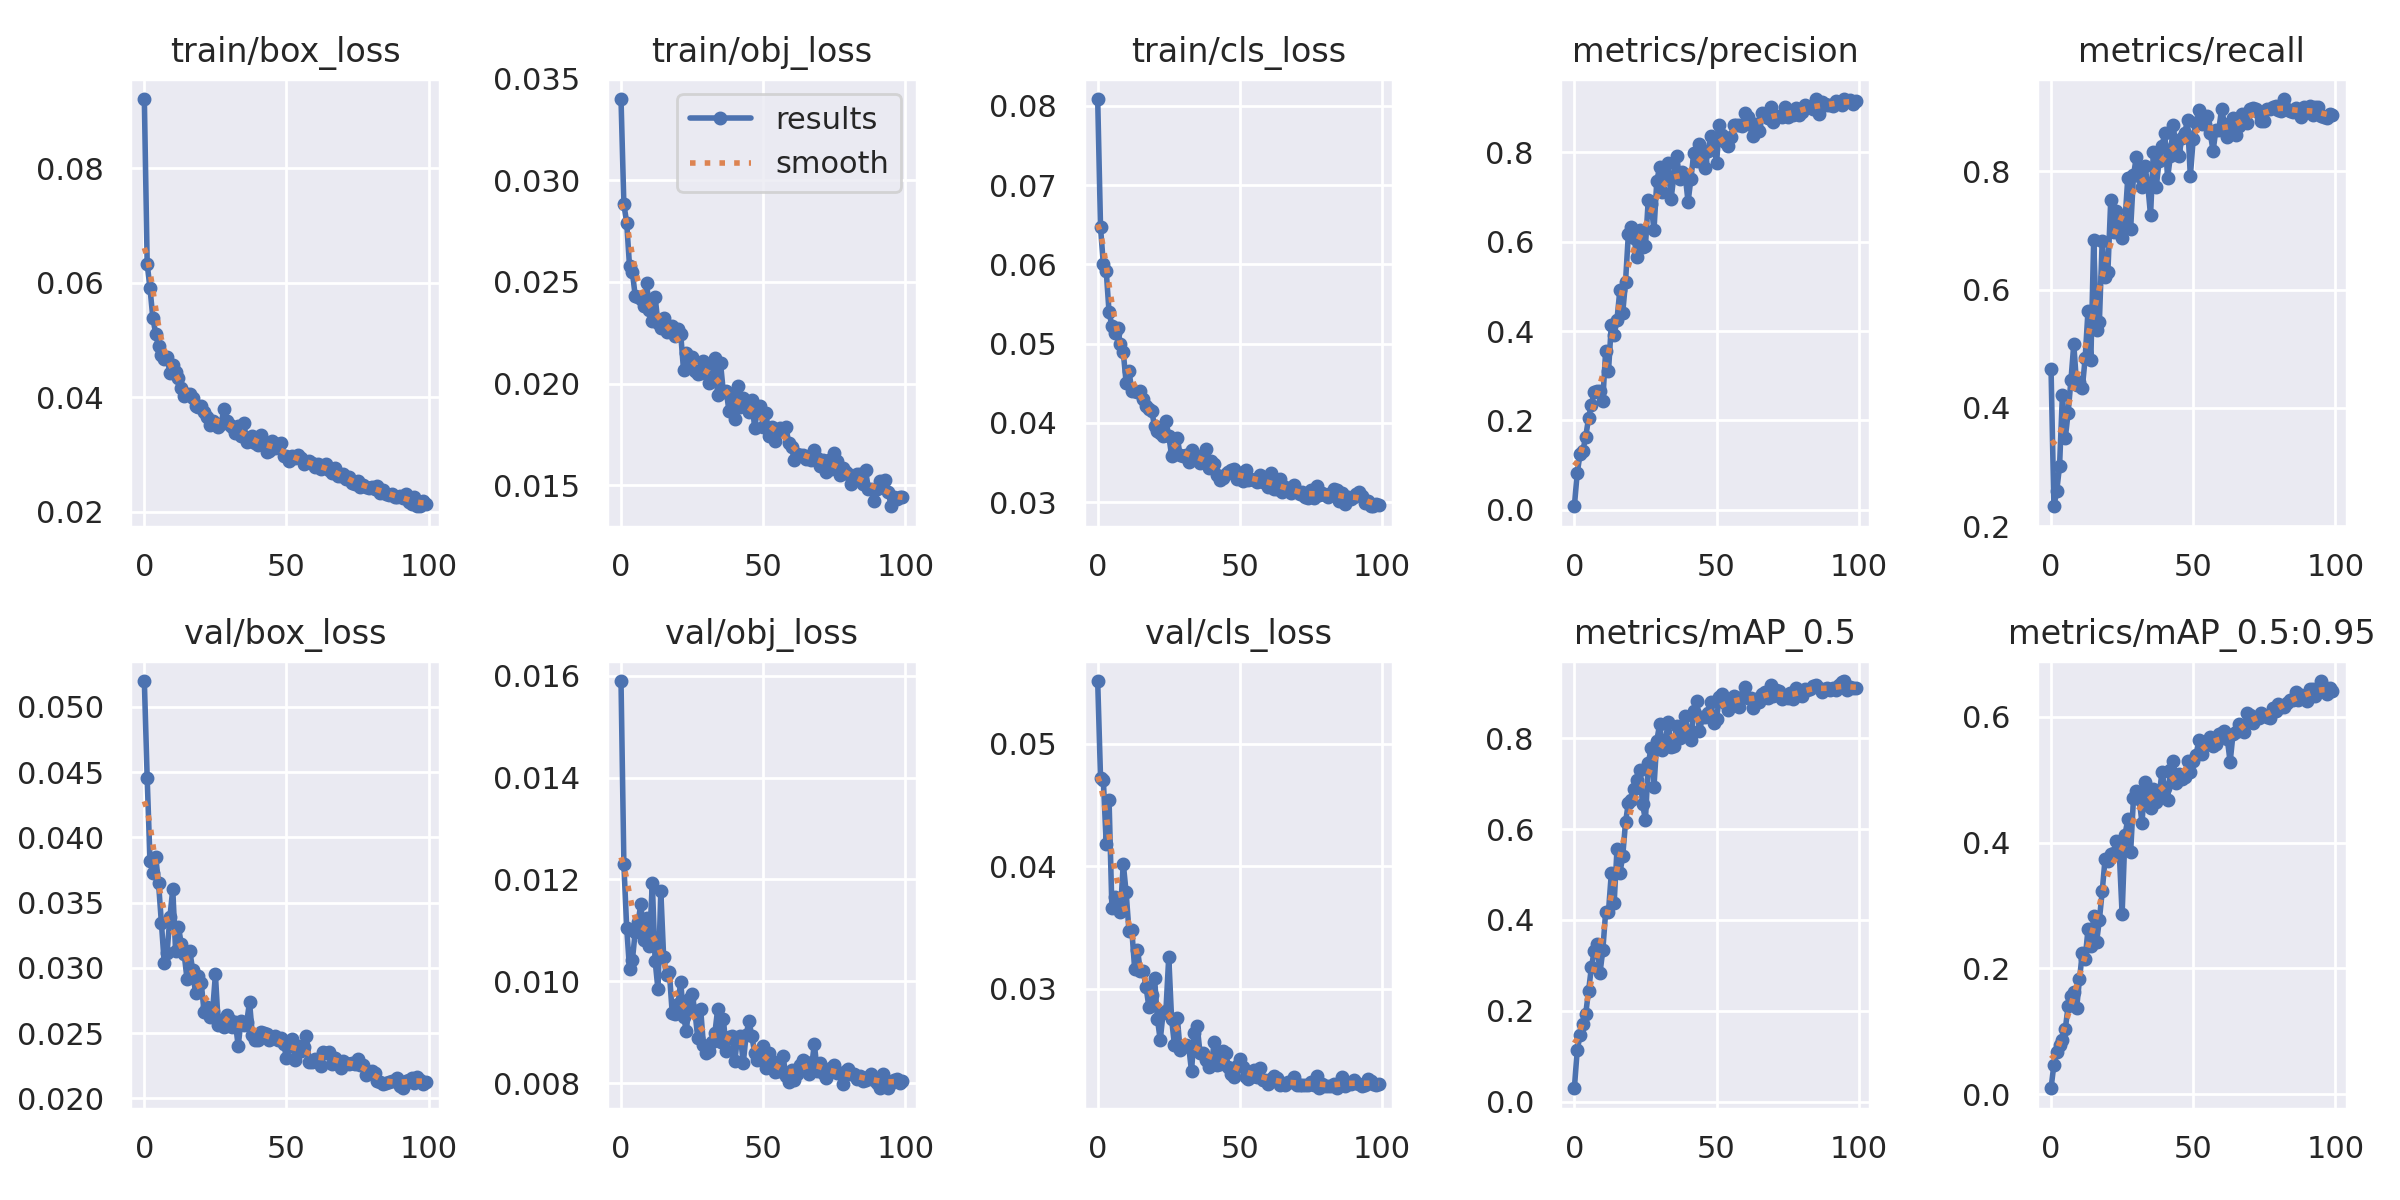

In [ ]:
from IPython.display import Image
Image(filename='/content/yolov5/runs/train/food-detect/results.png')
